In [31]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the ODE
def ode(y, t):
    return -0.5 * y  # Example: dy/dt = -0.5 * y

# Neural Network representing the solution
class ODENet(nn.Module):
    def __init__(self):
        super(ODENet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.fc(x)


   
# Loss function with the derivative term
def ode_loss(pred_y, true_y, t):
    dy_dt_pred=(pred_y[1:-1]-pred_y[0:-2])/100
   # loss = ((dy_dt_pred - ode(pred_y[1:-1], t[1:-1]))**2).mean()
    loss_1 = nn.MSELoss(pred_y,true_y)
    return loss_1


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train(model, optimizer, t, true_y, epochs=1000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        pred_y = model(t)
        loss = criterion(pred_y, true_y)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch {epoch}/{epochs}, Loss: {loss.item()}')

# Example data
t = torch.linspace(0, 1, 100, requires_grad=True).view(-1, 1)
true_y = torch.exp(-0.5 * t)  # True solution for the given example ODE

# Initialize the model and optimizer
model = ODENet()

# Train the model
train(model, optimizer, t, true_y, epochs=1000)

# Evaluate the trained model
with torch.no_grad():
    model.eval()
    predicted_y = model(t)

Epoch 0/1000, Loss: 1.5225400924682617


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

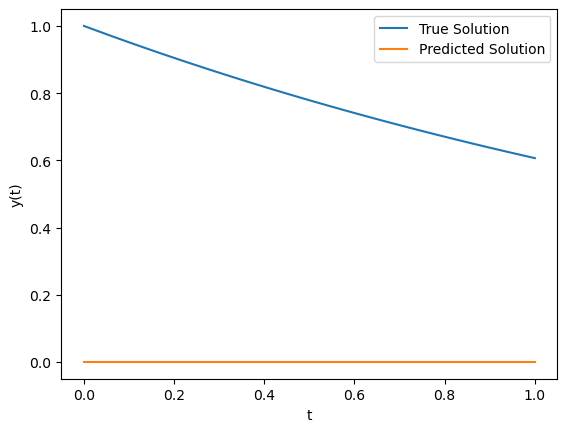

In [21]:
# Plot the results
import matplotlib.pyplot as plt

plt.plot(t.detach().numpy(), true_y.detach().numpy(), label='True Solution')
plt.plot(t.detach().numpy(), predicted_y.detach().numpy(), label='Predicted Solution')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the ordinary differential equation (ODE)
def ode(y, t):
    return -2 * y + torch.sin(t)

# Create a simple neural network to approximate the solution
class NeuralODE(nn.Module):
    def __init__(self):
        super(NeuralODE, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define the loss function incorporating the derivative
def loss_function(pred_y, true_y, t):
    # Compute the derivative of the predicted output with respect to time
    dy_dt = torch.autograd.grad(pred_y, t, grad_outputs=torch.ones_like(pred_y), create_graph=True)[0]

    # Compute the mean squared error with the true derivative
    mse = nn.MSELoss()(dy_dt, ode(pred_y, t))

    return mse

# Generate synthetic data
t = torch.linspace(0, 2, 100).view(-1, 1)  # Time points
true_y = torch.exp(-2 * t) * torch.cos(t)  # True solution

# Create an instance of the neural network and set up the optimizer
model = NeuralODE()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    pred_y = model(t)

    # Compute the loss
    loss = loss_function(pred_y, true_y, t)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the trained model on new data
test_t = torch.linspace(0, 3, 100).view(-1, 1)
predicted_y = model(test_t)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(t.numpy(), true_y.numpy(), label='True Solution')
plt.plot(test_t.numpy(), predicted_y.detach().numpy(), label='Predicted Solution', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()


RuntimeError: One of the differentiated Tensors does not require grad